In [1]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
from sklearn.datasets import load_iris

In [13]:
data = load_iris()["data"]
target = load_iris()["target"]

In [14]:
data.shape

(150, 4)

In [20]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

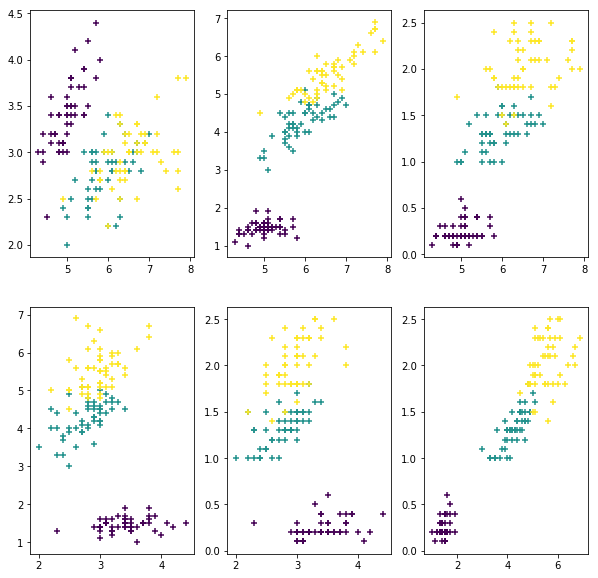

In [19]:
figure(figsize=(10, 10))

subplot(2,3,1)
scatter(data[:, 0], data[:, 1], c=target, marker = "+")
subplot(2,3,2)
scatter(data[:, 0], data[:, 2], c=target, marker = "+")
subplot(2,3,3)
scatter(data[:, 0], data[:, 3], c=target, marker = "+")
subplot(2,3,4)
scatter(data[:, 1], data[:, 2], c=target, marker = "+")
subplot(2,3,5)
scatter(data[:, 1], data[:, 3], c=target, marker = "+")
subplot(2,3,6)
scatter(data[:, 2], data[:, 3], c=target, marker = "+")

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target,
    shuffle=True,
    stratify=target
)

In [67]:
from sklearn.linear_model import LogisticRegression

In [41]:

model = RandomForestClassifier(n_estimators=500, n_jobs=4)

In [73]:
%%time
acc = []
x = []
for i in range(-5, 5):
    model = LogisticRegression(C=10**i)
    model.fit(X_train, y_train)
    ans = model.predict(X_test)
    acc.append(np.sum(ans==y_test)/ans.shape[0])
    x.append(i)

Wall time: 0 ns


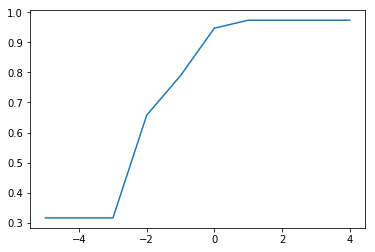

In [74]:
plot(x, acc)

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [90]:
y_test = (y_test==1).astype(int)
y_train = (y_train==1).astype(int)

In [91]:
model = LogisticRegression(C=1)
model.fit(X_train, y_train)
ans = model.predict(X_test)

In [92]:
accuracy_score(y_test, ans)

0.68421052631578949

In [93]:
precision_score(y_test, ans)

0.66666666666666663

In [94]:
recall_score(y_test, ans)

0.15384615384615385

In [95]:
f1_score(y_test, ans)

0.25

In [99]:
ans = model.predict_proba(X_test)
roc_auc_score(y_test, ans[:, 1])

0.84307692307692306